# **Tarea Machine Learning**

>  ## Parte 1: Modificación del *step size*

---





In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Modelo de regression Logistica

$$\hat{y} = p = \dfrac{1}{1 + \exp{-(\theta_0 + \theta_1 x)}} $$

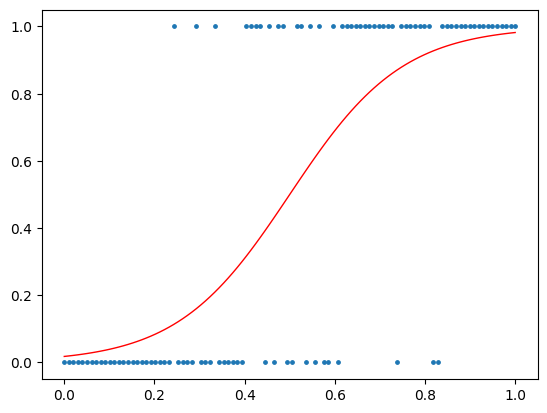

In [2]:
# Definimos el modelo
def y_hat1(theta_0, theta_1, x):
    p = 1. / (1. + np.exp(-(theta_0 + theta_1 * x)))
    return(p)
    
# Simulemos 100 datos para nuestra regression logistica
n1 = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_01, theta_11 = [-4, 8]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x11 = np.linspace(0, 1, n1)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y1 = np.random.binomial(1, y_hat1(theta_01, theta_11, x11), n1)

# Graficamos
plt.scatter(x11, y1, s= 6)
plt.plot(x11, y_hat1(-4, 8, x11), color='red', linewidth = 1)

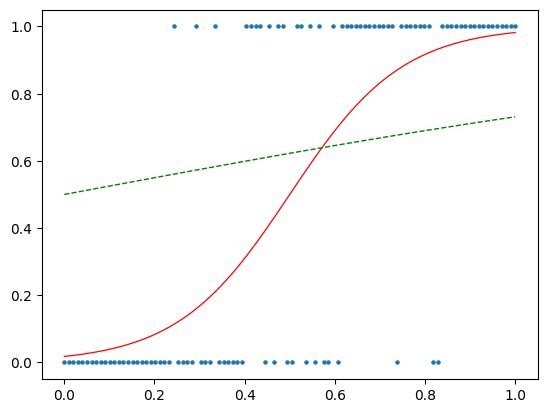

In [3]:
# Inicializar parametros
t01 = 0
t11 = 1

plt.scatter(x11, y1, s= 5)
plt.plot(x11, y_hat1(-4, 8, x11), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x11, y_hat1(t01, t11, x11), color= 'green', linewidth= 1, linestyle= '--')

Aquí vemos que la curva verde que está aprendiendo, no está ajustando muy bien. Entonces usamos SGD.

#### Loss function

$$ \mathcal{L} = -\dfrac{1}{n} \sum \left(Y \log(\hat{y}) + (1-Y) \log(1 - \hat{y}) \right)$$

In [4]:
# Definimos nuestra Loss function
def loss_fun1(Y, X, t0, t1):
    loss = -1/n1 * np.sum(Y * np.log(y_hat1(t01, t11, X)) + (1 - Y) * np.log(1 - y_hat1(t01, t11, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini1 = loss_fun1(y1, x11, t01, t11)
print("LOSS inicial:", loss_ini1)

LOSS inicial: 0.625630997545838


In [5]:
# Llevamos regsitro del error y los parametros
error1 = []
error1.append(loss_ini1)

t0_hat1 = []
t1_hat1 = []

t0_hat1.append(t01)
t1_hat1.append(t11)

#### Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum \hat{y} - y $$

$$\nabla_{\theta_1} \mathcal{L} = \sum (\hat{y} - y) x $$

In [10]:
# Gradient descent
def delta_theta_01(y1, x11, t01, t11):
    delta_01 = np.sum((y_hat1(t01, t11, x11) - y1))
    return(delta_01)

def delta_theta_11(y1, x11, t01, t11):
    delta_11 = np.sum((y_hat1(t01, t11, x11) - y1) * x11)
    return(delta_11)

# Step size o learnig rate
rho1 = .01
rho2 = .04
rho3 = .07
rho4 = .1

In [12]:
t01 -= rho4 * delta_theta_01(y1, x11, t01, t11)
t11 -= rho4 * delta_theta_11(y1, x11, t01, t11)

t0_hat1.append(t01)
t1_hat1.append(t11)

loss1 = loss_fun1(y1, x11, t01, t11)
error1.append(loss1)


print(t0_hat1, t1_hat1, error1, sep='\n')

[0, -0.11006820538605984, -0.46610750607938867, -0.7557151885008409, -1.2009183319815435]
[1, 1.0409748065014752, 1.3606964713184966, 1.9852666643001315, 2.9105595503890362]
[0.625630997545838, 0.6133103302664074, 0.5752920033882543, 0.5328833387273956, 0.4821850562888947]


Notamos que a medida que hacemos crecer el learning_rate el error va disminuyendo y t0_hat, t1_hat se van acercando al valor inicial más rápido si rho es grande. Si rho tiene valores pequeños el error disminuye más lento.

Text(0.5, 1.0, 'Loss en funcion del Epoch')

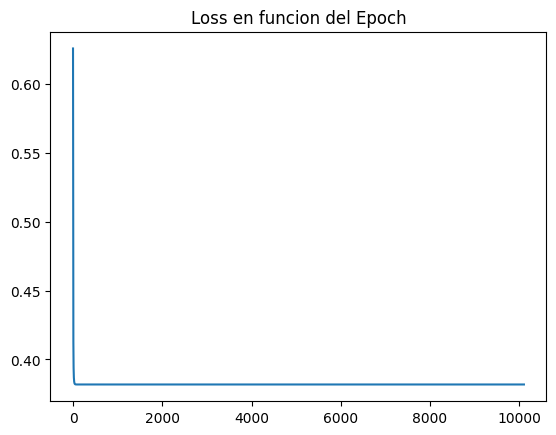

In [19]:
epoch = 1000

for i in range(epoch):
    t01 -= rho4 * delta_theta_01(y1, x11, t01, t11)
    t11 -= rho4 * delta_theta_11(y1, x11, t01, t11)
    
    t0_hat1.append(t01)
    t1_hat1.append(t11)
    
    loss1 = loss_fun1(y1, x11, t01, t11)
    error1.append(loss1)

plt.plot(error1)
plt.title("Loss en funcion del Epoch")

Notamos ahora con los epoch que baja mucho más rápido la curva azul dependiendo del tamaño de "rho". Si "rho" es muy grande se acerca más rápido a los valores iniciales y disminuye más rápido el error.

Comentario: durante la prueba de ver qué pasaba con los diferentes step size, cuando se habían hecho varios intentos llegó un punto donde pasó el valor inicial 8 y siguió creciendo en vez de devolverse. De todos modos al ver la gráfica de los epoch se ve que igual disminuye el error después de 1000 iteraciones.


> ## Parte 2: Graficar ${\theta_0}$ vs ${\theta_1}$

---





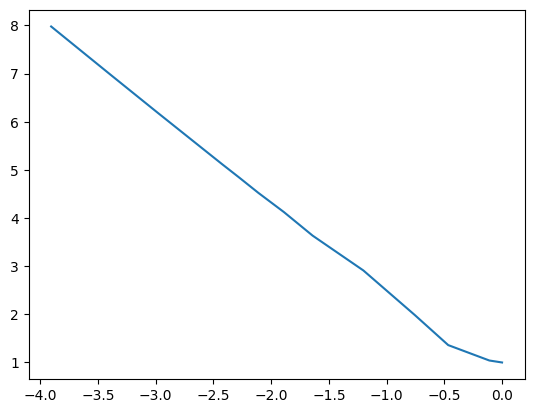

In [21]:
plt.plot(t0_hat1, t1_hat1)



> ## Parte 3: Nuevo modelo

---





## Modelo

$$\hat{y} = p = \dfrac{\theta_0x}{\theta_1 + x} + \epsilon$$

In [22]:
def y_hat(theta_0, theta_1,x):
  p = ((theta_0*x)/(theta_1 + x)) 
  return p 

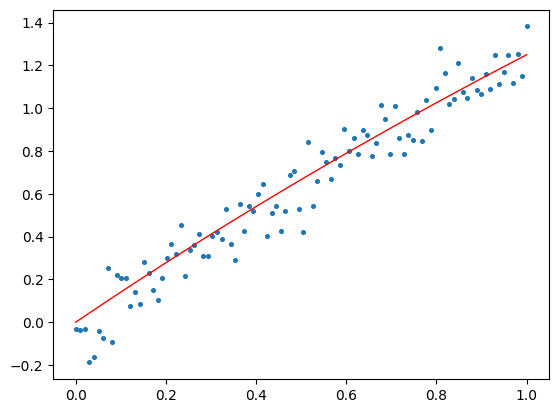

In [23]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [10, 7]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.normal(y_hat(theta_0, theta_1, x1), 0.1,n)

# Graficamos
plt.scatter(x1, y, s= 7)
plt.plot(x1, y_hat(10, 7, x1), color='red', linewidth = 1)

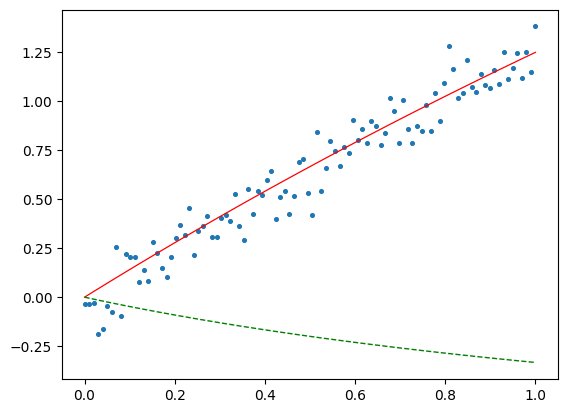

In [24]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = -1
t1 = 2

plt.scatter(x1, y, s= 7)
plt.plot(x1, y_hat(10, 7, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados (no aprendidos aun)
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

Vemos que no está ajustando bien. Por lo tanto no basta con aproximar con la recta verde. 

### Loss Function



> $$ \mathcal{L} = ||{Y -\hat{y}}||_2$$



In [25]:
from numpy.linalg import norm

# Definimos nuestra nueva Loss function
def loss_fun2(Y, X, t0, t1):
    loss = norm(Y-y_hat(t0,t1,X)) #(Y-y_hat(t0,t1,X,epsilon))*(Y-y_hat(t0,t1,X,epsilon))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun2(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 9.514949598975853


In [26]:
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

### Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum  - 2y\frac{x}{\mathcal{\theta_1}+x}+2\hat{y}\frac{x}{\mathcal{\theta_1}+x}$$

$$\nabla_{\theta_1} \mathcal{L} = \sum 2y\frac{\mathcal{\theta_0}x}{\mathcal({\theta_1}+x)^2} -2\hat{y}\frac{\mathcal{\theta_0}x}{\mathcal({\theta_1}+x)^2} $$

In [27]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum(-2*y*(x1/(t1+x1))+2*((t0*x1)/(t1+x1))*(x1/(t1+x1)))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((2*y)*((t0*x1)/(t1+x1)**2)-2*((t0*x1)/(t1+x1))*((t0*x1)/(t1+x1)**2))
    return(delta_1)


# Step size o learnig rate
rho = .05

In [28]:
t0 -= rho * delta_theta_0(y, x1, t0, t1)
t1 -= rho * delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun2(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[-1, 1.0027479135513393]
[2, 1.5947689104388068]
[9.514949598975853, 4.960846753750859]


Text(0.5, 1.0, 'Loss en funcion del Epoch')

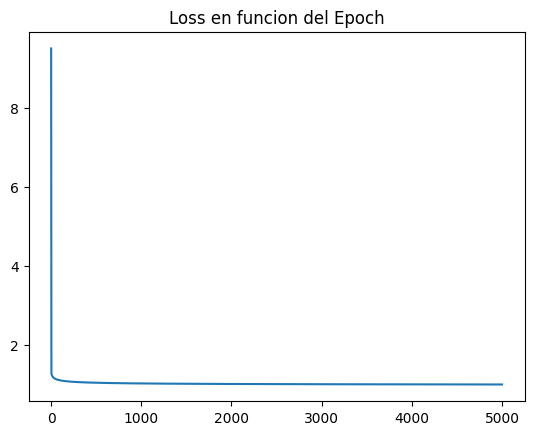

In [29]:
#ciclos
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun2(y, x1, t0, t1)
    error.append(loss)
    
plt.plot(error)
plt.title("Loss en funcion del Epoch")

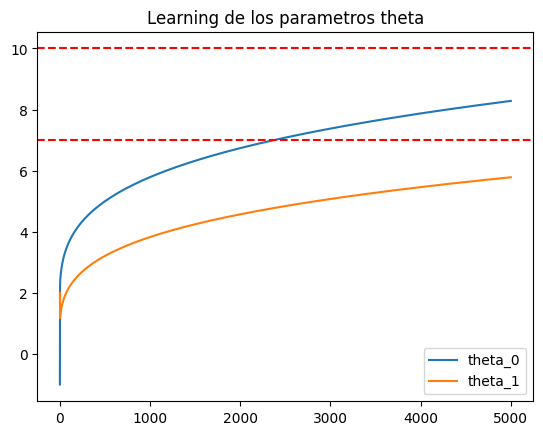

In [30]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

Vemos que al principio estaba aprendiendo mal, pero después de muchos ciclos podemos ver que se empieza a ajustar a lo que queremos. Podemos notar entonces que el modelo, desde el punto de machine learning no es un mal modelo.

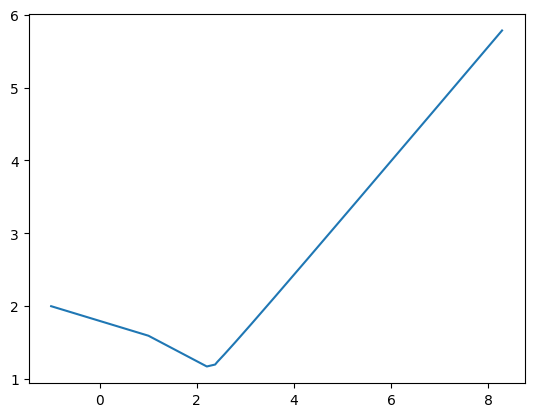

In [31]:
plt.plot(t0_hat, t1_hat)

Después de un cierto tiempo empieza a acercarse a los parámetros iniciales.

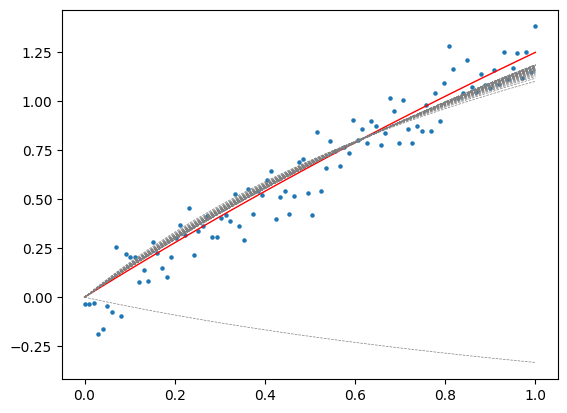

In [32]:
plt.scatter(x1, y, s=5)
plt.plot(x1,y_hat(10,7,x1),color='red',linewidth=1)

for i in range(50):
  plt.plot(x1, y_hat(t0_hat[10*i],t1_hat[10*i],x1),color= 'gray',linewidth=.5,linestyle='--')

Aquí también podemos notar que la primera curva gris es nuestra curva verde que salía al principio y que nos pudo hacer pensar que el modelo podría ser malo, pero vemos que es necesario ver más iteraciones antes de decidir si el modelo es bueno o malo, pues después de los 5000 epoch notamos que el modelo no es malo, pues se empieza a acercar a nuestra curva roja que ajustaba nuestros datos.

Text(0, 0.5, 'theta_1')

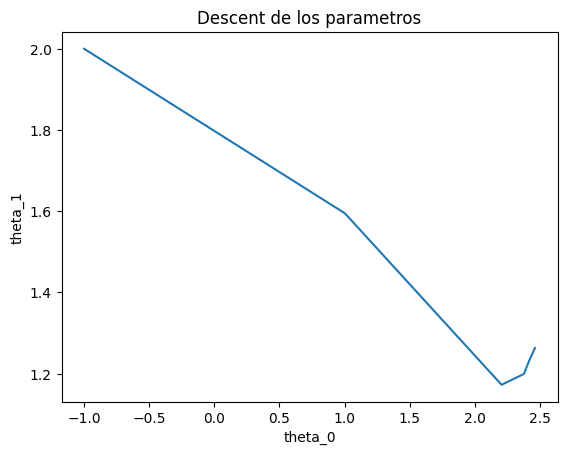

In [33]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')